<a href="https://colab.research.google.com/github/Antony-6487/Credit_Card_Fraud_Detection_Predictor/blob/main/Credit_Card_Fraud_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Python Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    average_precision_score,
    precision_score,
    recall_score,
    f1_score,
)

Importing warnings

In [3]:
import warnings

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use("ggplot")
np.set_printoptions(precision=4, suppress=True)
pd.set_option('display.float_format', '{:.4f}'.format)
warnings.filterwarnings("ignore")

Data Loading and EDA

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip
df = pd.read_csv("creditcard.csv", dtype={"Time": "float64", "Amount": "float64"})
df = df.sort_values("Time").reset_index(drop=True)


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open creditcardfraud.zip, creditcardfraud.zip.zip or creditcardfraud.zip.ZIP.


In [5]:
print("Data loaded successfully!")
print(df.shape)
print(df.head())

Data loaded successfully!
(9965, 31)
    Time      V1      V2     V3      V4      V5      V6      V7      V8  \
0 0.0000 -1.3598 -0.0728 2.5363  1.3782 -0.3383  0.4624  0.2396  0.0987   
1 0.0000  1.1919  0.2662 0.1665  0.4482  0.0600 -0.0824 -0.0788  0.0851   
2 1.0000 -1.3584 -1.3402 1.7732  0.3798 -0.5032  1.8005  0.7915  0.2477   
3 1.0000 -0.9663 -0.1852 1.7930 -0.8633 -0.0103  1.2472  0.2376  0.3774   
4 2.0000 -1.1582  0.8777 1.5487  0.4030 -0.4072  0.0959  0.5929 -0.2705   

       V9  ...     V21     V22     V23     V24     V25     V26     V27  \
0  0.3638  ... -0.0183  0.2778 -0.1105  0.0669  0.1285 -0.1891  0.1336   
1 -0.2554  ... -0.2258 -0.6387  0.1013 -0.3398  0.1672  0.1259 -0.0090   
2 -1.5147  ...  0.2480  0.7717  0.9094 -0.6893 -0.3276 -0.1391 -0.0554   
3 -1.3870  ... -0.1083  0.0053 -0.1903 -1.1756  0.6474 -0.2219  0.0627   
4  0.8177  ... -0.0094  0.7983 -0.1375  0.1413 -0.2060  0.5023  0.2194   

      V28   Amount  Class  
0 -0.0211 149.6200 0.0000  
1  0.0147  

In [ ]:
print("\nBasic Statistics:")
display(df.describe())


Basic Statistics:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11959.0000,11959.0000,11959.0000,11959.0000,11959.0000,11959.0000,11959.0000,11959.0000,11959.0000,11959.0000,...,11958.0000,11958.0000,11958.0000,11958.0000,11958.0000,11958.0000,11958.0000,11958.0000,11958.0000,11958.0000
mean,8009.9968,-0.2162,0.2771,0.8895,0.2826,-0.0866,0.1400,-0.1219,-0.0487,0.9116,...,-0.0615,-0.1539,-0.0337,0.0171,0.1048,0.0629,0.0083,0.0003,62.3526,0.0043
std,6204.3322,1.5839,1.3089,1.3318,1.4782,1.1918,1.3063,1.1539,1.2468,1.1923,...,0.9187,0.6266,0.5054,0.5914,0.4294,0.5616,0.4051,0.2612,178.2470,0.0658
min,0.0000,-27.6706,-34.6076,-22.8047,-4.6575,-32.0921,-23.4967,-26.5481,-23.6325,-7.1751,...,-11.4684,-8.5936,-19.2543,-2.5124,-4.7816,-1.3386,-7.9761,-3.5753,0.0000,0.0000
25%,2542.0000,-0.9789,-0.2615,0.4172,-0.6225,-0.6881,-0.6225,-0.5913,-0.1852,0.1967,...,-0.2682,-0.5436,-0.1718,-0.3333,-0.1441,-0.3539,-0.0801,-0.0155,5.0000,0.0000
50%,6662.0000,-0.3407,0.2563,0.9512,0.2130,-0.1838,-0.1469,-0.0949,0.0136,0.8949,...,-0.1301,-0.1249,-0.0443,0.0721,0.1431,0.0020,-0.0030,0.0155,15.9500,0.0000
75%,12382.0000,1.1613,0.8836,1.6137,1.1591,0.3463,0.5084,0.4317,0.2676,1.5891,...,0.0217,0.2340,0.0757,0.4018,0.3801,0.4092,0.1063,0.0732,50.0000,0.0000
max,20642.0000,1.9605,9.0921,4.1017,11.9275,34.0993,21.3931,34.3032,5.5000,10.3929,...,22.6149,4.5345,13.8762,3.2002,5.5251,3.5173,8.2544,4.8608,7712.4300,1.0000


In [6]:
# Check for missing values
print("Missing Values:")
display(df.isnull().sum())



Missing Values:


,0
Time,0
V1,0
V2,0
V3,1
V4,1
V5,1
V6,1
V7,1
V8,1
V9,1


In [7]:

print("\nDataset Information:")
display(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9965 non-null   float64
 1   V1      9965 non-null   float64
 2   V2      9965 non-null   float64
 3   V3      9964 non-null   float64
 4   V4      9964 non-null   float64
 5   V5      9964 non-null   float64
 6   V6      9964 non-null   float64
 7   V7      9964 non-null   float64
 8   V8      9964 non-null   float64
 9   V9      9964 non-null   float64
 10  V10     9964 non-null   float64
 11  V11     9964 non-null   float64
 12  V12     9964 non-null   float64
 13  V13     9964 non-null   float64
 14  V14     9964 non-null   float64
 15  V15     9964 non-null   float64
 16  V16     9964 non-null   float64
 17  V17     9964 non-null   float64
 18  V18     9964 non-null   float64
 19  V19     9964 non-null   float64
 20  V20     9964 non-null   float64
 21  V21     9964 no

None

Handling the Data Imbalance

In [ ]:
class_counts = df["Class"].value_counts()
print("Class Distribution:")
print(class_counts)
print(f"\nFraud Percentage: {100 * class_counts[1] / len(df):.3f}%")

Class Distribution:
Class
0.0000    11906
1.0000       52
Name: count, dtype: int64

Fraud Percentage: 0.435%


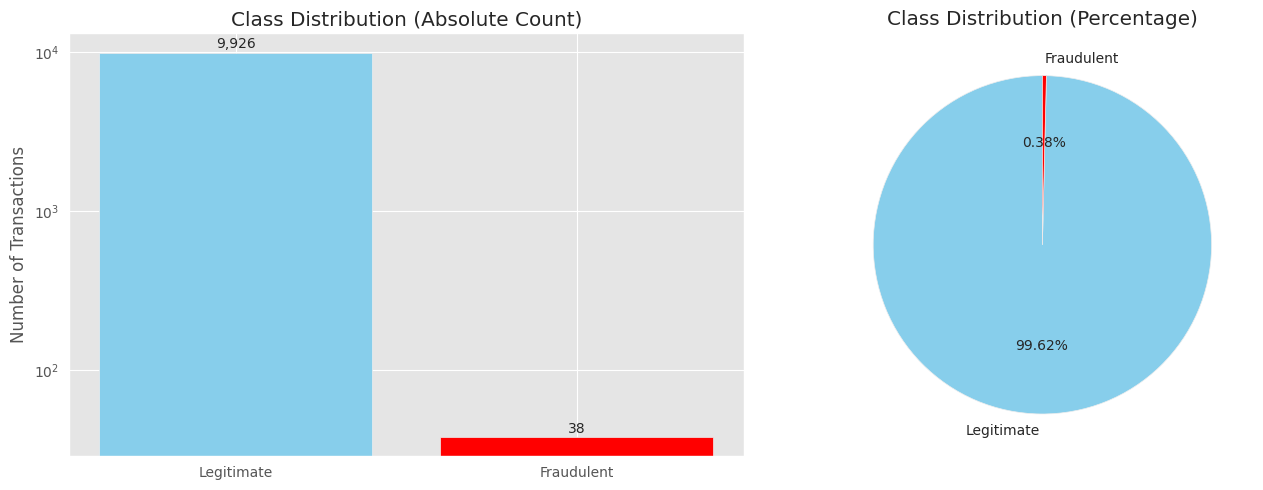

In [12]:
class_counts = df["Class"].value_counts()
# Visualize class imbalance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))#side by side plots
# Bar plot
bars = axes[0].bar(['Legitimate', 'Fraudulent'], class_counts.values, color=['skyblue', 'red'])
axes[0].set_ylabel('Number of Transactions')
axes[0].set_title('Class Distribution (Absolute Count)')
axes[0].set_yscale('log')  # Log scale to see both classes...since the fraudulent class is so small

# Add value labels on top of bars
axes[0].bar_label(bars, labels=[f'{v:,}' for v in class_counts.values],
                  label_type='edge', fontsize=10, padding=1)

# Pie chart
colors = ['skyblue', 'red']
axes[1].pie(class_counts.values, labels=['Legitimate', 'Fraudulent'],
            autopct='%1.2f%%', colors=colors, startangle=90)
axes[1].set_title('Class Distribution (Percentage)')

plt.tight_layout()
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

Feature Engineering

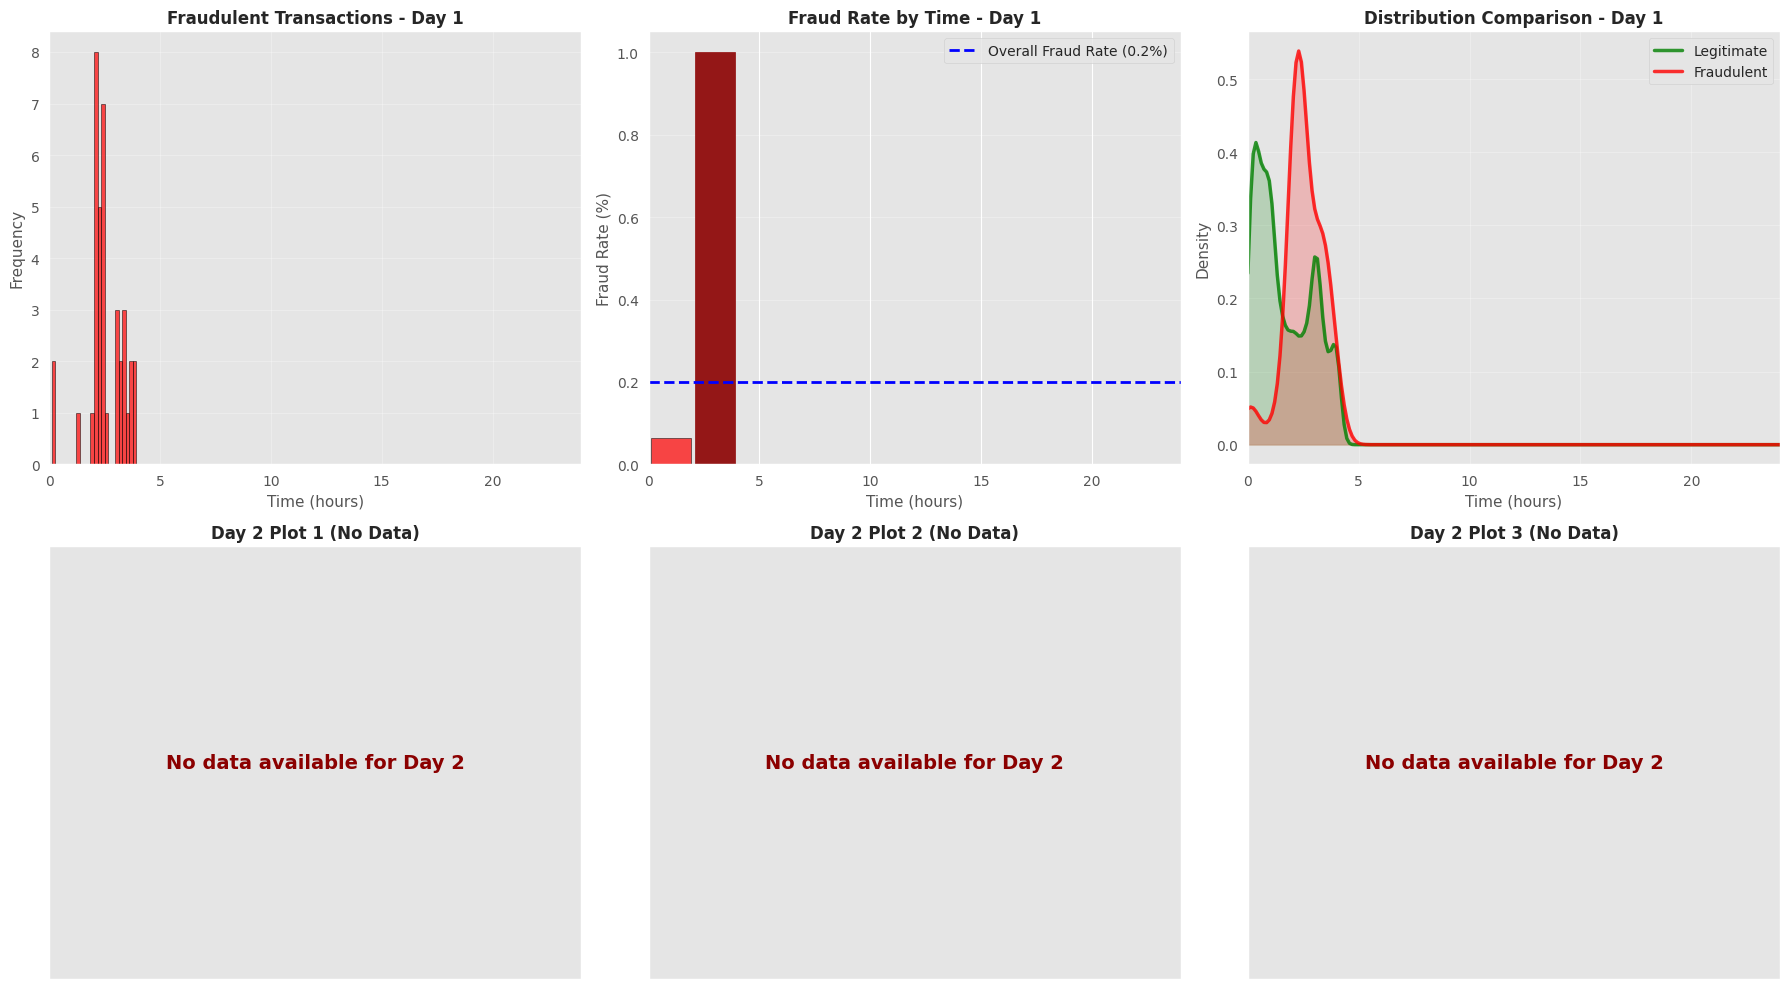

In [14]:

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

day1_mask = df["Time"] / 3600 < 24
day2_mask = df["Time"] / 3600 >= 24

day1_fraud = df[(df["Class"] == 1) & day1_mask]["Time"] / 3600
day2_fraud = (df[(df["Class"] == 1) & day2_mask]["Time"] / 3600) - 24

day1_legit = df[(df["Class"] == 0) & day1_mask]["Time"] / 3600
day2_legit = (df[(df["Class"] == 0) & day2_mask]["Time"] / 3600) - 24


# ============= DAY 1 (Top Row) =============

# Plot 1: Day 1 Fraudulent transaction volume
axes[0, 0].hist(day1_fraud, bins=24, alpha=0.7, color="red", edgecolor="black")
axes[0, 0].set_xlabel("Time (hours)", fontsize=11)
axes[0, 0].set_ylabel("Frequency", fontsize=11)
axes[0, 0].set_title("Fraudulent Transactions - Day 1", fontsize=12, fontweight="bold")
axes[0, 0].set_xlim(0, 24)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Day 1 Fraud rate by time
time_bins_day = np.linspace(0, 24, 13)  # 12 bins of 2 hours each
legit_counts_d1, _ = np.histogram(day1_legit, bins=time_bins_day)
fraud_counts_d1, _ = np.histogram(day1_fraud, bins=time_bins_day)
fraud_rate_d1 = fraud_counts_d1 / (legit_counts_d1 + fraud_counts_d1 + 1e-10) * 100
bin_centers_day = (time_bins_day[:-1] + time_bins_day[1:]) / 2

bars_d1 = axes[0, 1].bar(
    bin_centers_day, fraud_rate_d1, width=1.8, color="red", alpha=0.7, edgecolor="black"
)
axes[0, 1].axhline(
    y=0.2, color="blue", linestyle="--", linewidth=2, label="Overall Fraud Rate (0.2%)"
)

# Highlight high-risk periods
for i, rate in enumerate(fraud_rate_d1):
    if rate > 0.5:
        bars_d1[i].set_color("darkred")
        bars_d1[i].set_alpha(0.9)

axes[0, 1].set_xlabel("Time (hours)", fontsize=11)
axes[0, 1].set_ylabel("Fraud Rate (%)", fontsize=11)
axes[0, 1].set_title("Fraud Rate by Time - Day 1", fontsize=12, fontweight="bold")
axes[0, 1].set_xlim(0, 24)
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3, axis="y")

# Plot 3: Day 1 KDE
from scipy import stats

legit_kde_d1 = stats.gaussian_kde(day1_legit)
fraud_kde_d1 = stats.gaussian_kde(day1_fraud)
time_range_day = np.linspace(0, 24, 200)

axes[0, 2].plot(
    time_range_day,
    legit_kde_d1(time_range_day),
    color="green",
    linewidth=2.5,
    label="Legitimate",
    alpha=0.8,
)
axes[0, 2].plot(
    time_range_day,
    fraud_kde_d1(time_range_day),
    color="red",
    linewidth=2.5,
    label="Fraudulent",
    alpha=0.8,
)
axes[0, 2].fill_between(
    time_range_day, legit_kde_d1(time_range_day), alpha=0.2, color="green"
)
axes[0, 2].fill_between(
    time_range_day, fraud_kde_d1(time_range_day), alpha=0.2, color="red"
)
axes[0, 2].set_xlabel("Time (hours)", fontsize=11)
axes[0, 2].set_ylabel("Density", fontsize=11)
axes[0, 2].set_title("Distribution Comparison - Day 1", fontsize=12, fontweight="bold")
axes[0, 2].set_xlim(0, 24)
axes[0, 2].legend(fontsize=10)
axes[0, 2].grid(True, alpha=0.3)

# ============= DAY 2 (Bottom Row) =============
if day2_mask.any(): # Check if there is any data for Day 2
    # Plot 4: Day 2 Fraudulent transaction volume
    axes[1, 0].hist(day2_fraud, bins=24, alpha=0.7, color="red", edgecolor="black")
    axes[1, 0].set_xlabel("Time (hours)", fontsize=11)
    axes[1, 0].set_ylabel("Frequency", fontsize=11)
    axes[1, 0].set_title("Fraudulent Transactions - Day 2", fontsize=12, fontweight="bold")
    axes[1, 0].set_xlim(0, 24)
    axes[1, 0].grid(True, alpha=0.3)

    # Plot 5: Day 2 Fraud rate by time
    legit_counts_d2, _ = np.histogram(day2_legit, bins=time_bins_day)
    fraud_counts_d2, _ = np.histogram(day2_fraud, bins=time_bins_day)
    fraud_rate_d2 = fraud_counts_d2 / (legit_counts_d2 + fraud_counts_d2 + 1e-10) * 100

    bars_d2 = axes[1, 1].bar(
        bin_centers_day, fraud_rate_d2, width=1.8, color="red", alpha=0.7, edgecolor="black"
    )
    axes[1, 1].axhline(
        y=0.2, color="blue", linestyle="--", linewidth=2, label="Overall Fraud Rate (0.2%)"
    )

    # Highlight high-risk periods
    for i, rate in enumerate(fraud_rate_d2):
        if rate > 0.5:
            bars_d2[i].set_color("darkred")
            bars_d2[i].set_alpha(0.9)

    axes[1, 1].set_xlabel("Time (hours)", fontsize=11)
    axes[1, 1].set_ylabel("Fraud Rate (%)", fontsize=11)
    axes[1, 1].set_title("Fraud Rate by Time - Day 2", fontsize=12, fontweight="bold")
    axes[1, 1].set_xlim(0, 24)
    axes[1, 1].legend(fontsize=10)
    axes[1, 1].grid(True, alpha=0.3, axis="y")

    # Plot 6: Day 2 KDE
    # Check explicitly for data count for KDE
    has_legit_data = len(day2_legit) > 1
    has_fraud_data = len(day2_fraud) > 1

    if has_legit_data:
        legit_kde_d2 = stats.gaussian_kde(day2_legit)
        axes[1, 2].plot(
            time_range_day, legit_kde_d2(time_range_day), color="green", linewidth=2.5, label="Legitimate", alpha=0.8
        )
        axes[1, 2].fill_between(time_range_day, legit_kde_d2(time_range_day), alpha=0.2, color="green")
    if has_fraud_data:
        fraud_kde_d2 = stats.gaussian_kde(day2_fraud)
        axes[1, 2].plot(
            time_range_day, fraud_kde_d2(time_range_day), color="red", linewidth=2.5, label="Fraudulent", alpha=0.8
        )
        axes[1, 2].fill_between(time_range_day, fraud_kde_d2(time_range_day), alpha=0.2, color="red")

    if not has_legit_data and not has_fraud_data:
        axes[1, 2].text(0.5, 0.5, "Not enough data for Day 2 KDE",
                        horizontalalignment='center', verticalalignment='center',
                        transform=axes[1, 2].transAxes, fontsize=10, color='gray')
    else:
        axes[1, 2].set_xlabel("Time (hours)", fontsize=11)
        axes[1, 2].set_ylabel("Density", fontsize=11)
        axes[1, 2].set_title("Distribution Comparison - Day 2", fontsize=12, fontweight="bold")
        axes[1, 2].set_xlim(0, 24)
        axes[1, 2].legend(fontsize=10)
        axes[1, 2].grid(True, alpha=0.3)

else:
    # Handle the case where no data exists for Day 2 at all
    for idx in range(3):
        axes[1, idx].set_xticks([])
        axes[1, idx].set_yticks([])
        axes[1, idx].text(0.5, 0.5, "No data available for Day 2",
                          horizontalalignment='center', verticalalignment='center',
                          transform=axes[1, idx].transAxes,
                          fontsize=14, color='darkred', fontweight='bold')
        axes[1, idx].set_title(f"Day 2 Plot {idx+1} (No Data)", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.savefig("temporal_analysis_by_day.png", dpi=300, bbox_inches="tight")
plt.show()

**1.3 Data Preparation**


In [33]:
df_cleaned = df.dropna(subset=["Class"])
X = df_cleaned.drop("Class", axis=1)
y = df_cleaned["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTest set class distribution:")
print(y_test.value_counts())

Training set size: 42856
Test set size: 10714

Training set class distribution:
Class
0.0000    42734
1.0000      122
Name: count, dtype: int64

Test set class distribution:
Class
0.0000    10683
1.0000       31
Name: count, dtype: int64


In [34]:
# SCALING

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier manipulation
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

Prediction Models

In [38]:
import time


def evaluate_model(
    model,
    X_train,
    y_train,
    X_test,
    y_test,
    model_name,
    subtitle=None,
    verbose=False,
    show_confusion_matrix=True,
):
    """
    Train a model and generate comprehensive evaluation metrics and visualizations.

    Parameters:
    -----------
    model : sklearn estimator
        The machine learning model to train and evaluate
    X_train : array-like
        Training features
    y_train : array-like
        Training labels
    X_test : array-like
        Test features
    y_test : array-like
        Test labels
    model_name : str
        Name of the model for display purposes
    subtitle : str, optional
        Additional subtitle for the confusion matrix
    verbose : bool, optional
        Whether to print detailed output
    show_confusion_matrix : bool, optional
        Whether to display the confusion matrix plot

    Returns:
    --------
    dict : Dictionary containing predictions, probabilities, AUC score, and training time
    """
    # Print header
    header = f"{model_name}"

    if verbose:
        print("=" * len(header))
        print(header)
        print("=" * len(header))

    # Train model with timing
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    if training_time < 60:
        time_str = f"{training_time:.4f} seconds"
    elif training_time < 3600:
        minutes = int(training_time // 60)
        seconds = training_time % 60
        time_str = f"{minutes} minutes and {seconds:.2f} seconds"
    else:
        hours = int(training_time // 3600)
        remaining_seconds = training_time % 3600
        minutes = int(remaining_seconds // 60)
        seconds = remaining_seconds % 60
        time_str = f"{hours} hours, {minutes} minutes and {seconds:.2f} seconds"

    print(f"\nTraining Time: {time_str}")

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Classification Report
    if verbose:
        print("\nClassification Report:")
        print(
            classification_report(
                y_test,
                y_pred,
                target_names=["Fraudulenta", "Legitima"],
                labels=[1, 0],
            )
        )

    # ROC AUC Score
    auc_score = roc_auc_score(y_test, y_pred_proba)
    if verbose:
        print(f"\nROC AUC Score: {auc_score:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

    if show_confusion_matrix:
        # Plot Confusion Matrix
        plt.figure(figsize=(7, 5))
        ax = plt.gca()

        sns.heatmap(
            cm,
            annot=True,
            fmt="d",
            cmap="RdYlGn_r",
            xticklabels=["Fraudulenta", "Legitima"],
            yticklabels=["Fraudulenta", "Legitima"],
            cbar_kws={"label": "Count"},
            linewidths=2,
            linecolor="white",
            square=True,
            annot_kws={"size": 16, "weight": "bold"},
        )

        # Title with optional subtitle
        title = f"Confusion Matrix - {model_name}"
        if subtitle:
            title += f"\n{subtitle}"
        plt.title(title, fontweight="bold", fontsize=14, pad=20)

        plt.ylabel("Real (Actual)", fontweight="bold", fontsize=12)
        plt.xlabel("Predicción (Predicted)", fontweight="bold", fontsize=12)

        # Add TP, FN, FP, TN labels
        plt.text(
            0.5,
            0.25,
            "TP",
            ha="center",
            va="center",
            fontsize=14,
            color="white",
            weight="bold",
            bbox=dict(boxstyle="round,pad=0.5", facecolor="darkgreen", alpha=0.8),
        )
        plt.text(
            1.5,
            0.25,
            "FN",
            ha="center",
            va="center",
            fontsize=14,
            color="white",
            weight="bold",
            bbox=dict(boxstyle="round,pad=0.5", facecolor="darkred", alpha=0.8),
        )
        plt.text(
            0.5,
            1.25,
            "FP",
            ha="center",
            va="center",
            fontsize=14,
            color="white",
            weight="bold",
            bbox=dict(boxstyle="round,pad=0.5", facecolor="darkred", alpha=0.8),
        )
        plt.text(
            1.5,
            1.25,
            "TN",
            ha="center",
            va="center",
            fontsize=14,
            color="white",
            weight="bold",
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.8),
        )

        plt.tight_layout()
        plt.show()

    # Return results for further analysis
    return {
        "model": model,
        "predictions": y_pred,
        "probabilities": y_pred_proba,
        "auc_score": auc_score,
        "confusion_matrix": cm,
        "training_time": training_time,
    }


LOGISTIC REGRESSION


Training Time: 0.8950 seconds


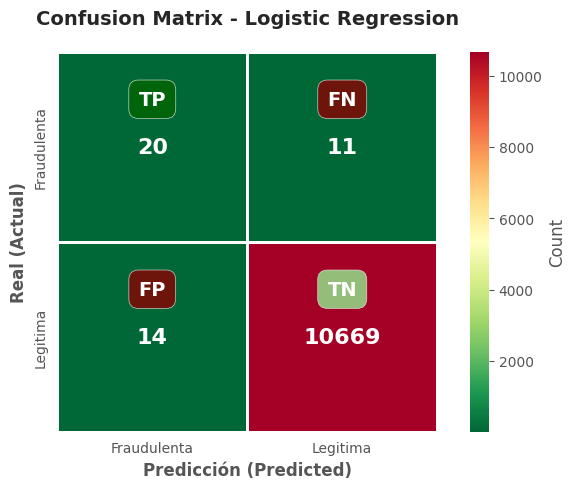

In [39]:
# Logistic Regression
lr_baseline = LogisticRegression(random_state=42, max_iter=1000)
results_lr = evaluate_model(
    model=lr_baseline,
    X_train=X_train_scaled,
    y_train=y_train,
    X_test=X_test_scaled,
    y_test=y_test,
    model_name="Logistic Regression",
    show_confusion_matrix=True
)

NAIVE BAYES CLASSIFIER


Training Time: 0.0498 seconds


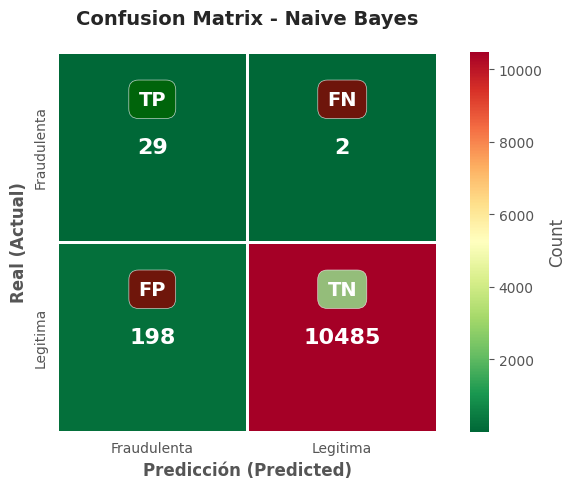

In [40]:
# Naive Bayes
nb = GaussianNB()
results_nb = evaluate_model(
    model=nb,
    X_train=X_train_scaled,
    y_train=y_train,
    X_test=X_test_scaled,
    y_test=y_test,
    model_name="Naive Bayes",
    show_confusion_matrix=True
)


Training Time: 0.5564 seconds


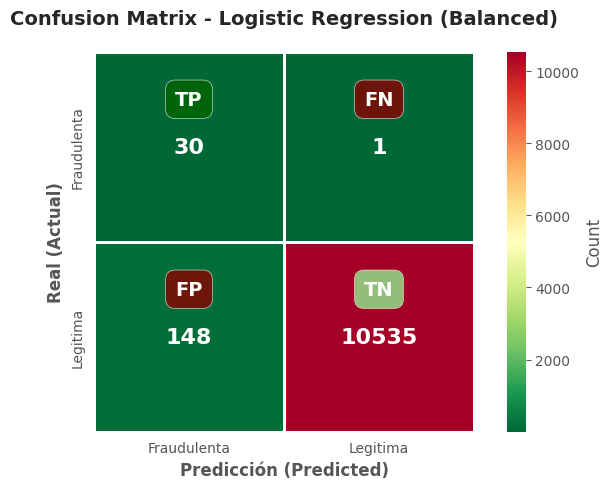

In [41]:
# LOGISTIC REGRESSION (BALANCED)
lr_balanced = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
results_lr_balanced = evaluate_model(
    model=lr_balanced,
    X_train=X_train_scaled,
    y_train=y_train,
    X_test=X_test_scaled,
    y_test=y_test,
    model_name="Logistic Regression (Balanced)",
    show_confusion_matrix=True
)